In [1]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,HuberRegressor
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor,RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter



In [2]:
df = pd.read_excel('imoveis.xlsx')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.fillna(0,inplace=True)
df = df[df['preço'] >= 1]
df['pm2'] = df['preço'] / df['area']
df.describe()

,area,preço,condominio,quartos,vagas,Academia,Aceita animais,Acesso para deficientes,Andar inteiro,Aquecimento,...,Varanda fechada com vidro,Varanda gourmet,Vigia,Vista exterior,Vista para a montanha,Vista para lago,Vista para o mar,Área de lazer,Área de serviço,pm2
count,27980.000000,2.798000e+04,2.798000e+04,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,...,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,2.798000e+04
mean,81.053181,7.165613e+05,1.946431e+03,2.236276,1.220622,0.295139,0.041816,0.000715,0.000036,0.003788,...,0.000036,0.021408,0.004968,0.000286,0.000036,0.000071,0.000143,0.000429,0.193531,inf
std,95.655134,3.200566e+06,4.288554e+04,0.834943,2.030356,0.456114,0.200171,0.026727,0.005978,0.061435,...,0.005978,0.144743,0.070309,0.016907,0.005978,0.008454,0.011956,0.020705,0.395073,NaN
min,0.000000,3.500000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.870039e+01
25%,50.000000,3.500000e+05,3.450000e+02,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.400000e+03
50%,67.000000,5.200000e+05,5.500000e+02,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.036599e+03
75%,89.000000,7.950000e+05,8.000000e+02,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007576e+04
max,4598.000000,5.210930e+08,4.100000e+06,20.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf


In [3]:
df2 = df[df['status'] == 'usado']
df3 = df2[df2['area'] >= 10]



q99 = df3.quantile(.99)
q01 = df3.quantile(.005)


df_cut = df3
df_cut['cut'] = (df3['area']>q99['area'])|(df3['preço']>q99['preço'])|(df3['pm2'] < 3000)|(df3['pm2'] > 50000)

df3 = df3.drop(df3[(df3['area']>q99['area'])].index)
df3 = df3.drop(df3[(df3['preço']>q99['preço'])].index)
df3 = df3.drop(df3[(df3['quartos']>q99['quartos'])].index)
df3 = df3.drop(df3[(df3['vagas']>q99['vagas'])].index)

df3 = df3.drop(df3[(df3['pm2'] > 30000)].index)
df3 = df3.drop(df3[(df3['pm2'] < 3000)].index)




df_cut.describe()

<ipython-input-3-d90b7ec35b13>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['cut'] = (df3['area']>q99['area'])|(df3['preço']>q99['preço'])|(df3['pm2'] < 3000)|(df3['pm2'] > 50000)


,area,preço,condominio,quartos,vagas,Academia,Aceita animais,Acesso para deficientes,Andar inteiro,Aquecimento,...,Varanda fechada com vidro,Varanda gourmet,Vigia,Vista exterior,Vista para a montanha,Vista para lago,Vista para o mar,Área de lazer,Área de serviço,pm2
count,27140.000000,2.714000e+04,2.714000e+04,27140.000000,27140.000000,27140.000000,27140.000000,27140.000000,27140.000000,27140.000000,...,27140.000000,27140.000000,27140.000000,27140.000000,27140.0,27140.0,27140.000000,27140.000000,27140.000000,27140.000000
mean,80.443110,6.840798e+05,2.006662e+03,2.233935,1.222144,0.303685,0.043073,0.000737,0.000037,0.003906,...,0.000037,0.022071,0.005122,0.000295,0.0,0.0,0.000111,0.000442,0.199447,8546.946401
std,95.319152,6.679132e+05,4.354278e+04,0.827414,2.046060,0.459857,0.203025,0.027137,0.006070,0.062374,...,0.006070,0.146916,0.071383,0.017167,0.0,0.0,0.010513,0.021023,0.399592,3386.291774
min,10.000000,3.500000e+04,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,48.700388
25%,50.000000,3.500000e+05,3.600000e+02,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,6417.570621
50%,67.000000,5.200000e+05,5.600000e+02,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,8050.847458
75%,88.000000,7.900000e+05,8.000000e+02,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,10032.269504
max,4598.000000,2.528000e+07,4.100000e+06,20.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,150000.000000


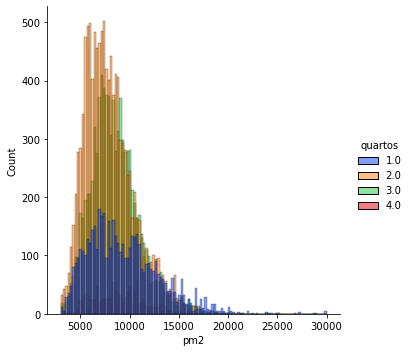

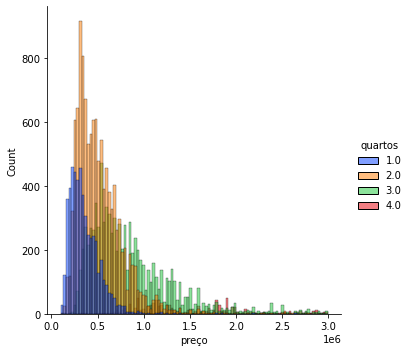

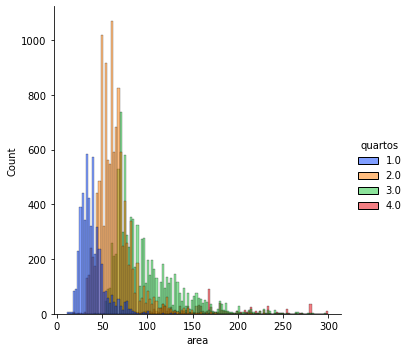

In [4]:
sns.displot(data=df3,x='pm2',hue='quartos',palette='bright')
sns.displot(data=df3,x='preço',hue='quartos',palette='bright')
sns.displot(data=df3,x='area',hue='quartos',palette='bright')

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df3[['preço','area','bairro','pm2','quartos']],hue='quartos',palette='bright')

In [ ]:
#%matplotlib notebook
plt.figure(figsize=(15,10))
df_cut2 = df_cut.drop(df_cut[(df_cut['preço'] > 10**7) | (df_cut['area'] > 500)].index)
sns.scatterplot(data=df_cut2,x='area',y='preço',hue='cut',size='pm2',sizes=(10,400))
df_cut['cut'].describe()

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(18,8))

sns.violinplot(ax=axes[0][0],y=df3['preço'],x=df3['quartos'])
sns.violinplot(ax=axes[0][1],y=df3['pm2'],x=df3['quartos'])
sns.violinplot(ax=axes[1][0],y=df3['preço'],x=df3['vagas'])
sns.violinplot(ax=axes[1][1],y=df3['pm2'],x=df3['vagas'])


In [ ]:
fig,axes = plt.subplots(3,1,figsize=(8,15))

sns.barplot(ax=axes[0],data=df3.groupby('bairro',as_index=False)['preço'].mean().sort_values(by='preço',ascending=False),
            x='preço',y='bairro')
sns.barplot(ax=axes[1],data=df3.groupby('bairro',as_index=False)['area'].mean().sort_values(by='area',ascending=False),
            x='area',y='bairro')
sns.barplot(ax=axes[2],data=df3.groupby('bairro',as_index=False)['pm2'].mean().sort_values(by='pm2',ascending=False),
            x='pm2',y='bairro')

In [ ]:
#plt.figure(figsize=(15,5))
#sns.displot(df3,x='pm2',col='quartos',row='bairro')

In [ ]:
plt.figure(figsize=(20,10))

sns.scatterplot(data=df3,x='area',y='preço',hue='quartos',size='pm2',sizes=(20,300),palette='bright')

In [ ]:
df4 = df3.drop(['ID','endereço','status','link','cut'],axis=1)
#df4 = df3[['preço','bairro','condominio','area','quartos','vagas','pm2']]
df4 = pd.get_dummies(df4,columns=['bairro'])
df4.info()

In [ ]:
x = df4.drop(['preço','pm2'],axis=1)
y = df4['preço']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [ ]:
models = [
    LinearRegression(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    HistGradientBoostingRegressor(),
    RandomForestRegressor()]

In [ ]:
resultado = {'model':[],'score':[]}
fig,axes = plt.subplots(5,1,figsize=(8,30))

n=0
for model in models:
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    resultado['model'].append(str(model))
    resultado['score'].append(round(model.score(x_test,y_test),2))
    sns.scatterplot(ax=axes[n],x=prediction,y=y_test).set_title(f'{model} Score: {round(model.score(x_test,y_test),2)}')
    n+=1
    
df_result = pd.DataFrame(resultado)    

In [ ]:
df_result